In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load csv
review_df = pd.read_csv("diabeticbloodteststrips_review_raw.csv")
review_df

,asin,url,score,sponsored,amazonChoice,bestSeller,amazonPrime,title,thumbnail,position.page,position.position,position.global_position,price.discounted,price.current_price,price.currency,price.before_price,price.savings_amount,price.savings_percent,reviews.total_reviews,reviews.rating
0,B0727VTQGC,https://www.amazon.com/dp/B0727VTQGC,28358.4,False,False,False,False,Sponsored Ad - Accu-Chek Guide Test Strips for...,https://m.media-amazon.com/images/I/714JiizOqt...,1,2,1,False,24.99,USD,0.00,0.00,0.00,5908,4.8
1,B07CF8C4VX,https://www.amazon.com/dp/B07CF8C4VX,33825.6,False,False,True,False,"CONTOUR NEXT Blood Glucose Test Strips, 70 Count",https://m.media-amazon.com/images/I/81aPkB4QWV...,1,5,2,True,23.99,USD,26.58,2.59,9.74,7047,4.8
2,B06XJG1KS9,https://www.amazon.com/dp/B06XJG1KS9,6825.7,False,False,False,True,6 x 50 ct TRUE METRIX® NFRS Test Strips (300 T...,https://m.media-amazon.com/images/I/71ehsIk4x2...,1,6,3,True,53.00,USD,60.00,7.00,11.67,1393,4.9
3,B06XHXXCVV,https://www.amazon.com/dp/B06XHXXCVV,10636.8,False,False,False,True,3 x 50ct TRUE METRIX® NFRS Test Strips (150 Te...,https://m.media-amazon.com/images/I/61dQiW53kj...,1,7,4,False,30.00,USD,0.00,0.00,0.00,2216,4.8
4,B00Y4KOBWK,https://www.amazon.com/dp/B00Y4KOBWK,6182.4,False,False,False,True,True Metrix Blood Glucose Test Strips Box of 50,https://m.media-amazon.com/images/I/6127qkwgav...,1,8,5,True,12.45,USD,18.29,5.84,31.93,1288,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,B09GZK133Z,https://www.amazon.com/dp/B09GZK133Z,53.9,False,False,False,True,"Pip Complete Kit | 1 Meter, 50 Test Strips, 50...",https://m.media-amazon.com/images/I/51FUIR3N7X...,1,53,52,False,0.00,USD,0.00,0.00,0.00,11,4.9
161,B09GKYPZ35,https://www.amazon.com/dp/B09GKYPZ35,5.0,False,False,False,True,Pip Blood Glucose Test Strips (50 Count),https://m.media-amazon.com/images/I/41d8L6kjpl...,1,54,53,False,0.00,USD,0.00,0.00,0.00,1,5.0
162,B07XYC6MX2,https://www.amazon.com/dp/B07XYC6MX2,64.4,False,False,False,False,Embrace Blood Glucose Pro Test Strips 50ct,https://m.media-amazon.com/images/I/41jlL1SAJN...,1,55,54,False,0.00,USD,0.00,0.00,0.00,14,4.6
163,B07K6KC8Z4,https://www.amazon.com/dp/B07K6KC8Z4,340.8,False,False,False,True,Oh’Care Lite Blood Sugar Testing Monitor – Glu...,https://m.media-amazon.com/images/I/71KdMiRtFb...,1,56,55,False,0.00,USD,0.00,0.00,0.00,71,4.8


In [3]:
#Drop duplicate rows and items using url
df = review_df.drop_duplicates()
df = df.drop_duplicates(subset=['url'])
df

,asin,url,score,sponsored,amazonChoice,bestSeller,amazonPrime,title,thumbnail,position.page,position.position,position.global_position,price.discounted,price.current_price,price.currency,price.before_price,price.savings_amount,price.savings_percent,reviews.total_reviews,reviews.rating
0,B0727VTQGC,https://www.amazon.com/dp/B0727VTQGC,28358.4,False,False,False,False,Sponsored Ad - Accu-Chek Guide Test Strips for...,https://m.media-amazon.com/images/I/714JiizOqt...,1,2,1,False,24.99,USD,0.00,0.00,0.00,5908,4.8
1,B07CF8C4VX,https://www.amazon.com/dp/B07CF8C4VX,33825.6,False,False,True,False,"CONTOUR NEXT Blood Glucose Test Strips, 70 Count",https://m.media-amazon.com/images/I/81aPkB4QWV...,1,5,2,True,23.99,USD,26.58,2.59,9.74,7047,4.8
2,B06XJG1KS9,https://www.amazon.com/dp/B06XJG1KS9,6825.7,False,False,False,True,6 x 50 ct TRUE METRIX® NFRS Test Strips (300 T...,https://m.media-amazon.com/images/I/71ehsIk4x2...,1,6,3,True,53.00,USD,60.00,7.00,11.67,1393,4.9
3,B06XHXXCVV,https://www.amazon.com/dp/B06XHXXCVV,10636.8,False,False,False,True,3 x 50ct TRUE METRIX® NFRS Test Strips (150 Te...,https://m.media-amazon.com/images/I/61dQiW53kj...,1,7,4,False,30.00,USD,0.00,0.00,0.00,2216,4.8
4,B00Y4KOBWK,https://www.amazon.com/dp/B00Y4KOBWK,6182.4,False,False,False,True,True Metrix Blood Glucose Test Strips Box of 50,https://m.media-amazon.com/images/I/6127qkwgav...,1,8,5,True,12.45,USD,18.29,5.84,31.93,1288,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,B07R7F4B29,https://www.amazon.com/dp/B07R7F4B29,1663.8,False,False,False,False,CURO G6s Blood Glucose Test Strips Includes To...,https://m.media-amazon.com/images/I/51b9ZlaVSg...,1,51,50,False,0.00,USD,0.00,0.00,0.00,354,4.7
159,B07G4FTDL1,https://www.amazon.com/dp/B07G4FTDL1,1541.0,False,False,False,True,O’Well Tyson Bio HT100 Blood Glucose Test Stri...,https://m.media-amazon.com/images/I/61AB017UbI...,1,52,51,False,0.00,USD,0.00,0.00,0.00,335,4.6
160,B09GZK133Z,https://www.amazon.com/dp/B09GZK133Z,53.9,False,False,False,True,"Pip Complete Kit | 1 Meter, 50 Test Strips, 50...",https://m.media-amazon.com/images/I/51FUIR3N7X...,1,53,52,False,0.00,USD,0.00,0.00,0.00,11,4.9
162,B07XYC6MX2,https://www.amazon.com/dp/B07XYC6MX2,64.4,False,False,False,False,Embrace Blood Glucose Pro Test Strips 50ct,https://m.media-amazon.com/images/I/41jlL1SAJN...,1,55,54,False,0.00,USD,0.00,0.00,0.00,14,4.6


In [4]:
#Grab needed columns and sort by number of reviews
df = df[['title', 'bestSeller', 'amazonPrime', 'score','reviews.total_reviews', 'reviews.rating', 'asin', 'url']]
df = df.sort_values(by=['reviews.total_reviews'], ascending=False)
df

,title,bestSeller,amazonPrime,score,reviews.total_reviews,reviews.rating,asin,url
6,TRUE METRIX Blood Glucose Test Strips NFRS 100...,False,True,50635.2,10549,4.8,B085WBVJZZ,https://www.amazon.com/dp/B085WBVJZZ
11,Sponsored Ad - Care Touch Blood Glucose Test S...,False,True,45470.4,9473,4.8,B0794DFH6F,https://www.amazon.com/dp/B0794DFH6F
134,"AZO Urinary Tract Infection (UTI) Test Strips,...",False,True,41984.2,9127,4.6,B00854L57U,https://www.amazon.com/dp/B00854L57U
1,"CONTOUR NEXT Blood Glucose Test Strips, 70 Count",True,False,33825.6,7047,4.8,B07CF8C4VX,https://www.amazon.com/dp/B07CF8C4VX
0,Sponsored Ad - Accu-Chek Guide Test Strips for...,False,False,28358.4,5908,4.8,B0727VTQGC,https://www.amazon.com/dp/B0727VTQGC
...,...,...,...,...,...,...,...,...
121,Diabetic Test Strips (6 Boxes 300 Count) 7308 ...,False,False,32.9,7,4.7,B09N9YBNN6,https://www.amazon.com/dp/B09N9YBNN6
88,"Medline Evencare G2 Blood Glucose Test Strips,...",False,True,25.8,6,4.3,B00Q3YYUW6,https://www.amazon.com/dp/B00Q3YYUW6
139,TRUEtrack Blood Glucose Test Strips(150 Count)...,False,False,28.2,6,4.7,B0784GJ8FT,https://www.amazon.com/dp/B0784GJ8FT
157,100ct Embrace Pro Blood Glucose Test Strips wi...,False,False,5.0,1,5.0,B09R83SQGF,https://www.amazon.com/dp/B09R83SQGF


In [5]:
#check which rows had Sponsored Ad in front
df[df['title'].str.contains("Sponsored Ad - ")]

,title,bestSeller,amazonPrime,score,reviews.total_reviews,reviews.rating,asin,url
11,Sponsored Ad - Care Touch Blood Glucose Test S...,False,True,45470.4,9473,4.8,B0794DFH6F,https://www.amazon.com/dp/B0794DFH6F
0,Sponsored Ad - Accu-Chek Guide Test Strips for...,False,False,28358.4,5908,4.8,B0727VTQGC,https://www.amazon.com/dp/B0727VTQGC
19,Sponsored Ad - OneTouch Verio Test Strips for ...,False,True,13606.5,2895,4.7,B08FXRYSPG,https://www.amazon.com/dp/B08FXRYSPG
50,Sponsored Ad - Metene TD-4116 Blood Glucose Mo...,False,True,11884.5,2641,4.5,B09FJND82M,https://www.amazon.com/dp/B09FJND82M
26,Sponsored Ad - OneTouch Verio Test Strips for ...,False,True,11880.0,2475,4.8,B08L47PMX6,https://www.amazon.com/dp/B08L47PMX6
51,Sponsored Ad - Accu-Chek Guide Me Meter for Di...,False,False,6903.0,1534,4.5,B07Z9N65F8,https://www.amazon.com/dp/B07Z9N65F8
24,Sponsored Ad - The CONTOUR NEXT EZ Blood Gluco...,False,True,1917.6,408,4.7,B009B7SK8M,https://www.amazon.com/dp/B009B7SK8M
49,Sponsored Ad - Uric Acid Test Strips - Track W...,False,True,828.8,224,3.7,B077JKHRJ5,https://www.amazon.com/dp/B077JKHRJ5
52,"Sponsored Ad - Blood Sugar Test Kit, Diabetes ...",False,True,364.0,91,4.0,B09KC4TXZ7,https://www.amazon.com/dp/B09KC4TXZ7
53,Sponsored Ad - Oh’Care Lite Blood Sugar Testin...,False,True,352.8,72,4.9,B07K6K7LJ4,https://www.amazon.com/dp/B07K6K7LJ4


In [6]:
#Removew "Sponsored Ad" string from title values
df["title"] = df["title"].str.replace("Sponsored Ad - ", "")

In [7]:
#Split the first 2 words from title to use as brand name
df[['brand1', 'brand2', 'spec']] = df['title'].str.split(' ', 2, expand=True)
df['brand'] = df[['brand1', 'brand2']].agg(' '.join, axis=1)
df

,title,bestSeller,amazonPrime,score,reviews.total_reviews,reviews.rating,asin,url,brand1,brand2,spec,brand
6,TRUE METRIX Blood Glucose Test Strips NFRS 100...,False,True,50635.2,10549,4.8,B085WBVJZZ,https://www.amazon.com/dp/B085WBVJZZ,TRUE,METRIX,Blood Glucose Test Strips NFRS 100ct (100 Test...,TRUE METRIX
11,Care Touch Blood Glucose Test Strips for Diabe...,False,True,45470.4,9473,4.8,B0794DFH6F,https://www.amazon.com/dp/B0794DFH6F,Care,Touch,Blood Glucose Test Strips for Diabetes I For U...,Care Touch
134,"AZO Urinary Tract Infection (UTI) Test Strips,...",False,True,41984.2,9127,4.6,B00854L57U,https://www.amazon.com/dp/B00854L57U,AZO,Urinary,"Tract Infection (UTI) Test Strips, Accurate Re...",AZO Urinary
1,"CONTOUR NEXT Blood Glucose Test Strips, 70 Count",True,False,33825.6,7047,4.8,B07CF8C4VX,https://www.amazon.com/dp/B07CF8C4VX,CONTOUR,NEXT,"Blood Glucose Test Strips, 70 Count",CONTOUR NEXT
0,Accu-Chek Guide Test Strips for Diabetic Blood...,False,False,28358.4,5908,4.8,B0727VTQGC,https://www.amazon.com/dp/B0727VTQGC,Accu-Chek,Guide,Test Strips for Diabetic Blood Glucose Testing...,Accu-Chek Guide
...,...,...,...,...,...,...,...,...,...,...,...,...
121,Diabetic Test Strips (6 Boxes 300 Count) 7308 ...,False,False,32.9,7,4.7,B09N9YBNN6,https://www.amazon.com/dp/B09N9YBNN6,Diabetic,Test,Strips (6 Boxes 300 Count) 7308 with Glucose T...,Diabetic Test
88,"Medline Evencare G2 Blood Glucose Test Strips,...",False,True,25.8,6,4.3,B00Q3YYUW6,https://www.amazon.com/dp/B00Q3YYUW6,Medline,Evencare,"G2 Blood Glucose Test Strips, For self-testing...",Medline Evencare
139,TRUEtrack Blood Glucose Test Strips(150 Count)...,False,False,28.2,6,4.7,B0784GJ8FT,https://www.amazon.com/dp/B0784GJ8FT,TRUEtrack,Blood,Glucose Test Strips(150 Count) by SuccessfulDe...,TRUEtrack Blood
157,100ct Embrace Pro Blood Glucose Test Strips wi...,False,False,5.0,1,5.0,B09R83SQGF,https://www.amazon.com/dp/B09R83SQGF,100ct,Embrace,Pro Blood Glucose Test Strips with 100ct 30g L...,100ct Embrace


In [8]:
#Clean brand name and rename column
df["brand"] = df["brand"].str.replace("Blood Glucose", "Care Touch")
df["brand"] = df["brand"].str.replace("6 x", "TRUE METRIX")
df["brand"] = df["brand"].str.replace("5 x", "TRUE METRIX")
df["brand"] = df["brand"].str.replace("4 x", "TRUE METRIX")
df["brand"] = df["brand"].str.replace("3 x", "TRUE METRIX")
df["brand"] = df["brand"].str.replace("2 x", "TRUE METRIX")
df.loc[df['brand1'] == 'Prodigy', 'brand'] = 'Prodigy'
df.loc[df['brand1'] == 'Accu-Chek', 'brand'] = 'Accu-Chek'
df.loc[df['brand1'] == 'AZO', 'brand'] = 'AZO'
df.loc[df['brand1'] == 'Dario', 'brand'] = 'Dario'
df.loc[df['brand1'] == 'Metene', 'brand'] = 'Metene'
df.loc[df['brand1'] == 'iHealth', 'brand'] = 'iHealth'
df.loc[df['brand1'] == 'TrueTrack', 'brand'] = 'TrueTrack'
df.loc[df['brand1'] == 'FreeStyle', 'brand'] = 'FreeStyle'
df.loc[df['brand1'] == 'Ultra', 'brand'] = 'Ultra'
df.loc[df['brand1'] == 'Optiums', 'brand'] = 'Optiums'
df = df.rename(columns={"reviews.total_reviews": "total_reviews", "reviews.rating": "rating"})
df

,title,bestSeller,amazonPrime,score,total_reviews,rating,asin,url,brand1,brand2,spec,brand
6,TRUE METRIX Blood Glucose Test Strips NFRS 100...,False,True,50635.2,10549,4.8,B085WBVJZZ,https://www.amazon.com/dp/B085WBVJZZ,TRUE,METRIX,Blood Glucose Test Strips NFRS 100ct (100 Test...,TRUE METRIX
11,Care Touch Blood Glucose Test Strips for Diabe...,False,True,45470.4,9473,4.8,B0794DFH6F,https://www.amazon.com/dp/B0794DFH6F,Care,Touch,Blood Glucose Test Strips for Diabetes I For U...,Care Touch
134,"AZO Urinary Tract Infection (UTI) Test Strips,...",False,True,41984.2,9127,4.6,B00854L57U,https://www.amazon.com/dp/B00854L57U,AZO,Urinary,"Tract Infection (UTI) Test Strips, Accurate Re...",AZO
1,"CONTOUR NEXT Blood Glucose Test Strips, 70 Count",True,False,33825.6,7047,4.8,B07CF8C4VX,https://www.amazon.com/dp/B07CF8C4VX,CONTOUR,NEXT,"Blood Glucose Test Strips, 70 Count",CONTOUR NEXT
0,Accu-Chek Guide Test Strips for Diabetic Blood...,False,False,28358.4,5908,4.8,B0727VTQGC,https://www.amazon.com/dp/B0727VTQGC,Accu-Chek,Guide,Test Strips for Diabetic Blood Glucose Testing...,Accu-Chek
...,...,...,...,...,...,...,...,...,...,...,...,...
121,Diabetic Test Strips (6 Boxes 300 Count) 7308 ...,False,False,32.9,7,4.7,B09N9YBNN6,https://www.amazon.com/dp/B09N9YBNN6,Diabetic,Test,Strips (6 Boxes 300 Count) 7308 with Glucose T...,Diabetic Test
88,"Medline Evencare G2 Blood Glucose Test Strips,...",False,True,25.8,6,4.3,B00Q3YYUW6,https://www.amazon.com/dp/B00Q3YYUW6,Medline,Evencare,"G2 Blood Glucose Test Strips, For self-testing...",Medline Evencare
139,TRUEtrack Blood Glucose Test Strips(150 Count)...,False,False,28.2,6,4.7,B0784GJ8FT,https://www.amazon.com/dp/B0784GJ8FT,TRUEtrack,Blood,Glucose Test Strips(150 Count) by SuccessfulDe...,TRUEtrack Blood
157,100ct Embrace Pro Blood Glucose Test Strips wi...,False,False,5.0,1,5.0,B09R83SQGF,https://www.amazon.com/dp/B09R83SQGF,100ct,Embrace,Pro Blood Glucose Test Strips with 100ct 30g L...,100ct Embrace


In [9]:
#Save df as csv file
df.to_csv("diabeticbloodteststrips_review_clean_v1.csv", index=False, header=True)

In [10]:
#Filter df to graph
filter_df = df.loc[(df['total_reviews'] >= 2500)]
filter_df

,title,bestSeller,amazonPrime,score,total_reviews,rating,asin,url,brand1,brand2,spec,brand
6,TRUE METRIX Blood Glucose Test Strips NFRS 100...,False,True,50635.2,10549,4.8,B085WBVJZZ,https://www.amazon.com/dp/B085WBVJZZ,TRUE,METRIX,Blood Glucose Test Strips NFRS 100ct (100 Test...,TRUE METRIX
11,Care Touch Blood Glucose Test Strips for Diabe...,False,True,45470.4,9473,4.8,B0794DFH6F,https://www.amazon.com/dp/B0794DFH6F,Care,Touch,Blood Glucose Test Strips for Diabetes I For U...,Care Touch
134,"AZO Urinary Tract Infection (UTI) Test Strips,...",False,True,41984.2,9127,4.6,B00854L57U,https://www.amazon.com/dp/B00854L57U,AZO,Urinary,"Tract Infection (UTI) Test Strips, Accurate Re...",AZO
1,"CONTOUR NEXT Blood Glucose Test Strips, 70 Count",True,False,33825.6,7047,4.8,B07CF8C4VX,https://www.amazon.com/dp/B07CF8C4VX,CONTOUR,NEXT,"Blood Glucose Test Strips, 70 Count",CONTOUR NEXT
0,Accu-Chek Guide Test Strips for Diabetic Blood...,False,False,28358.4,5908,4.8,B0727VTQGC,https://www.amazon.com/dp/B0727VTQGC,Accu-Chek,Guide,Test Strips for Diabetic Blood Glucose Testing...,Accu-Chek
33,Accu-Chek Guide Test Strips for Diabetic Blood...,False,False,28358.4,5908,4.8,B087NPJX1W,https://www.amazon.com/dp/B087NPJX1W,Accu-Chek,Guide,Test Strips for Diabetic Blood Glucose Testing...,Accu-Chek
29,"TRUE METRIX Blood Glucose Test Strips, 50 Count",False,True,27576.0,5745,4.8,B013UCPRKC,https://www.amazon.com/dp/B013UCPRKC,TRUE,METRIX,"Blood Glucose Test Strips, 50 Count",TRUE METRIX
10,Freestyle lite glucose test strips 50 count,False,False,23424.8,4984,4.7,B075VD1JTW,https://www.amazon.com/dp/B075VD1JTW,Freestyle,lite,glucose test strips 50 count,Freestyle lite
31,Dario 100 Blood Glucose No Coding Needed Test ...,False,True,21756.3,4629,4.7,B07JPYMWYZ,https://www.amazon.com/dp/B07JPYMWYZ,Dario,100,Blood Glucose No Coding Needed Test Strips Car...,Dario
115,"ReliOn Prime Blood Glucose Test Strips, 100 Co...",False,False,19848.0,4135,4.8,B018F4BVDM,https://www.amazon.com/dp/B018F4BVDM,ReliOn,Prime,"Blood Glucose Test Strips, 100 Count, Single Pack",ReliOn Prime


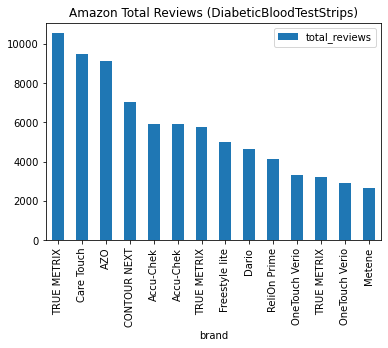

In [11]:
filter_df.plot.bar(x='brand', y=['total_reviews'], rot=90, title = 'Amazon Total Reviews (DiabeticBloodTestStrips)')
plt.savefig("DiabeticBloodTestStrips_review_2022_4_26.png" , dpi = 2400, bbox_inches = "tight")

In [12]:
#Since there are multiple items from the same brand, grab needed columns to use for aggregate
brand_df = df[['brand', 'total_reviews']]
brand_df

,brand,total_reviews
6,TRUE METRIX,10549
11,Care Touch,9473
134,AZO,9127
1,CONTOUR NEXT,7047
0,Accu-Chek,5908
...,...,...
121,Diabetic Test,7
88,Medline Evencare,6
139,TRUEtrack Blood,6
157,100ct Embrace,1


In [13]:
#Sum and groupby brand name
sum_df = brand_df.groupby(['brand']).agg('sum').reset_index()

#Check if summed correctly by filtering a brand name
#care_df = sum_df[sum_df["brand"] == "Care Touch"]
#care_df

#Sort the aggregated sum_df by total reviews, then filter it to graph
sum_df = sum_df.sort_values(by=['total_reviews'], ascending=False)
filter_sum_df = sum_df.loc[(sum_df['total_reviews'] >= 2500)]
filter_sum_df

,brand,total_reviews
68,TRUE METRIX,27002
5,Accu-Chek,14583
19,Care Touch,10077
4,AZO,9127
53,OneTouch Verio,9107
15,CONTOUR NEXT,8543
61,Prodigy,6640
39,Freestyle lite,4984
22,Dario,4907
65,ReliOn Prime,4711


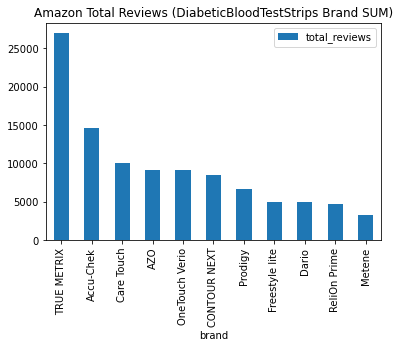

In [14]:
#Graph and save
filter_sum_df.plot.bar(x='brand', y=['total_reviews'], rot=90, title = 'Amazon Total Reviews (DiabeticBloodTestStrips Brand SUM)')
plt.savefig("DiabeticBloodTestStrips_brand_review_2022_4_26.png" , dpi = 2400, bbox_inches = "tight")

In [15]:
brand_list = filter_sum_df['brand'].tolist()
review_list = filter_sum_df['total_reviews'].tolist()
len(brand_list)

11

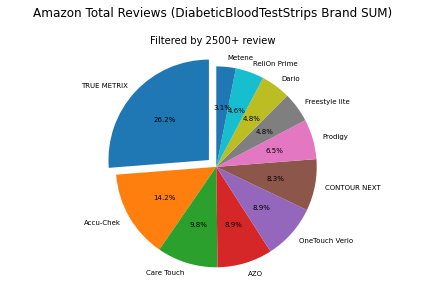

In [16]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = brand_list
sizes = review_list
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, textprops={'fontsize': 7})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.suptitle('Amazon Total Reviews (DiabeticBloodTestStrips Brand SUM)')
plt.title('Filtered by 2500+ review', fontsize=10)
plt.tight_layout()
plt.savefig("DiabeticBloodTestStrips_brand_Reviews_pie_2022_4_26.png" , dpi = 2400, bbox_inches = "tight")
plt.show()